# 1. Introduction

This is the third notebook for the EUAC; After Data Collection and Data Cleaning. <br>
The purpose of this notebook is to do analysis on the data that was collected and cleaned in the previous notebooks. This can include player/tournament statistics or discovering hidden insights. <br>
The project exists as there is currently no way to get any form of statistical/cumultive information.  
  
**About:**  
The EUAC (European ARMS Competitive) is a video game tournament series that took place regularly from 2017-2024.  
  
There will be three main pandas dataframes used throughout. These are:  
- **df:** Each rows consists of each match that was played. Contains player and tournament information.
- **playerdf:** Contains player identifying information. Also used for keeping track of multiple accounts by the same player.
- **statsdf:** Holds statistics about the players that will be gotten from this notebook.

# 2. Import Libraries and Setup

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set theme
sns.set_theme(style="whitegrid", rc={
    'figure.figsize': (10, 6), 
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.edgecolor': 'gray'
})

In [3]:
df = pd.read_csv("CleanedSets.csv")
playerdf = pd.read_csv("CleanedDetails.csv")

In [4]:
df.head()

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
0,Alumento,Owdy,Alumento,2-0,Owdy,1,1,2017-10-21,11,7,22,17,1
1,BambooBoss,Frank001,Frank001,2-0,BambooBoss,2,1,2017-10-21,14,13,19,5,1
2,Kotorious BRD,Altair,Kotorious BRD,0--1,Altair,3,1,2017-10-21,15,13,18,17,1
3,RD | | Dushni,Raffa_,Raffa_,2-0,RD | | Dushni,4,1,2017-10-21,12,17,21,4,1
4,InkA_,D2S_Maxou,InkA_,2-1,D2S_Maxou,5,1,2017-10-21,13,9,20,1,1


In [5]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player
0,0,164493,2ednar,2ednar
1,0,2992428,AU_Leenykins,AU_Leenykins
2,0,2942327,Alfon42,Alfon42
3,0,4324849,Alistair__,Alistair13
4,0,5390120,Alistair__,Alistair__


# 3. Data Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player1        2187 non-null   object
 1   Player2        2187 non-null   object
 2   Winner         2187 non-null   object
 3   Score          2187 non-null   object
 4   Loser          2187 non-null   object
 5   MatchNo        2187 non-null   int64 
 6   EUAC           2187 non-null   object
 7   Date           2187 non-null   object
 8   P1 Seed        2187 non-null   int64 
 9   P1 Placement   2187 non-null   int64 
 10  P2 Seed        2187 non-null   int64 
 11  P2 Placement   2187 non-null   int64 
 12  Tournament No  2187 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 222.2+ KB


In [7]:
playerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Start ID      133 non-null    int64 
 1   Challonge ID  133 non-null    int64 
 2   Player_Map    133 non-null    object
 3   Player        133 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.3+ KB


In [8]:
df.describe()

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,11.574303,4.479195,4.236854,6.924554,5.653406,50.218107
std,7.840901,3.373773,2.900556,3.992133,3.365320,32.214550
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,2.000000,4.000000,3.000000,21.000000
50%,10.000000,4.000000,4.000000,6.000000,5.000000,49.000000
75%,16.000000,6.000000,5.000000,9.000000,9.000000,75.000000
max,49.000000,25.000000,17.000000,25.000000,25.000000,111.000000


In [9]:
df.isnull().sum()

Player1          0
Player2          0
Winner           0
Score            0
Loser            0
MatchNo          0
EUAC             0
Date             0
P1 Seed          0
P1 Placement     0
P2 Seed          0
P2 Placement     0
Tournament No    0
dtype: int64

In [10]:
df.shape

(2187, 13)

In [11]:
playerdf.shape

(133, 4)

# 4. Player Overview  
  
Overview on player statistics.  
To get information on activitiy, win/loss statistics, and average placement.

## 4.1. Most Active Players

Identifying the most active players.  
This will be accomplished by counting each player's appearance in a tournament.

In [12]:
# Function to count EUACs entered given a player name
def no_of_euac_entered(df, person):
    try:
        tempdf = df[df.apply(lambda row: row.astype(str).str.contains(person).any(), axis = 1)]
        return len(tempdf["EUAC"].unique())
    except:
        print(f"{person} not found in database")

In [13]:
# Add EUAC Appearances as a column to playerdf after running function on every player in database
array  = []
for i in playerdf["Player"]:
    array.append(no_of_euac_entered(df,i))
playerdf["EUAC Appearances"] = array

In [14]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [15]:
# Create a seperate dataframe for stats. Easier to read 
statsdf = playerdf.copy()

In [16]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [17]:
statsdf.drop(["Start ID", "Challonge ID", "Player"],axis=1, inplace=True)

In [18]:
statsdf.head()

,Player_Map,EUAC Appearances
0,2ednar,1
1,AU_Leenykins,2
2,Alfon42,10
3,Alistair__,4
4,Alistair__,14


In [19]:
# Group by unique player. Sum appearances
statsdf = statsdf.groupby(["Player_Map"])["EUAC Appearances"].sum().reset_index()

In [20]:
# Average EUAC appearances per player
statsdf['EUAC Appearances'].mean()

9.428571428571429

In [21]:
# Median
statsdf['EUAC Appearances'].median()

2.0

In [22]:
statsdf['EUAC Appearances'].mode()

0    1
Name: EUAC Appearances, dtype: int64

A median less than mean suggests that the distribtion will be right skewed

Text(0.5, 1.0, 'Distribution of EUAC Appearances')

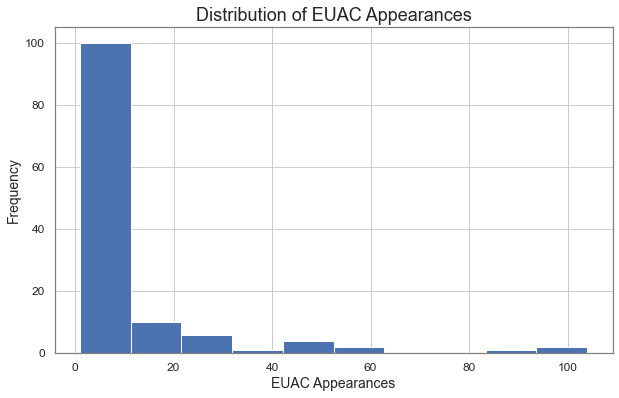

In [23]:
# Histogram of EUAC Appearances
statsdf['EUAC Appearances'].hist()

# add labels and title
plt.xlabel('EUAC Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of EUAC Appearances')

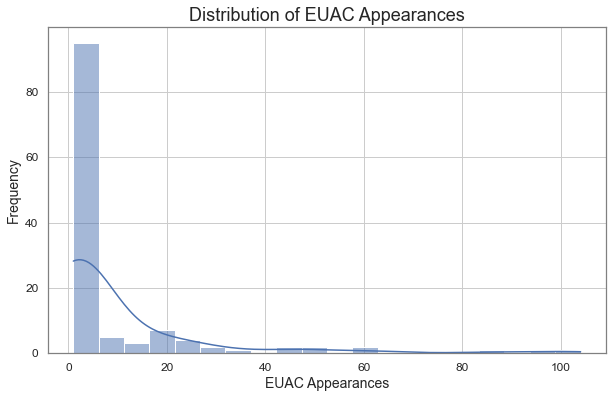

In [24]:
# Histogram with KDE curve
sns.histplot(statsdf['EUAC Appearances'], kde=True, bins=20)

# Labels and title
plt.xlabel('EUAC Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of EUAC Appearances')
plt.show()

The tournament series contains a lot of players who come to check it out. It tapers off. The series seems to have few, but very dedicated players. With appearances reaching over 100.

In [25]:
# 10 Most Active Players sorted by appearances
statsdf.sort_values(by="EUAC Appearances", ascending=False).head(10)

,Player_Map,EUAC Appearances
106,YoshiBowser,104
81,Ripha,97
105,Yamber,85
116,ocrim_ger,62
37,Iceman92,62
38,Iloria,50
74,Penzo,48
34,Grimwood96,46
119,replicant___,43
63,Mortal_Instrument,33


YoshiBowser is the only player with over 100 appearances. Just with the top 10, we can see the gap between number 1 and 10 in terms of appearances. Showing why the distribution has such a steep tail.

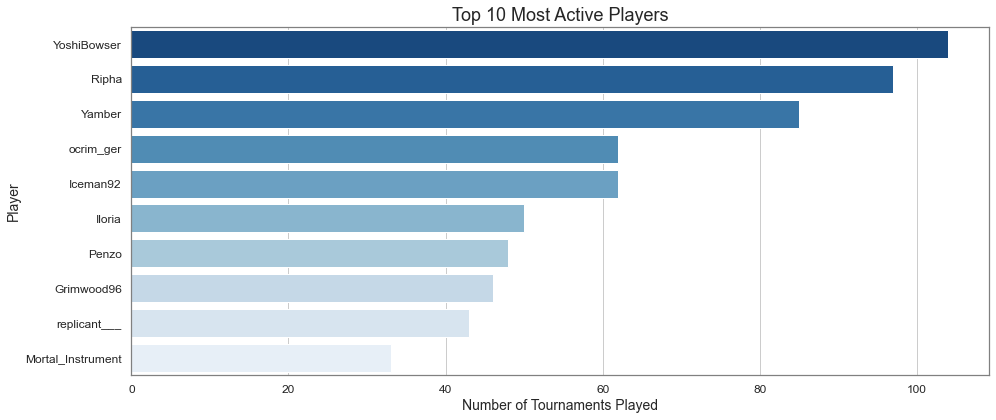

In [35]:
# Count tournaments per player
tourneyCounts = statsdf.sort_values(by="EUAC Appearances", ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=tourneyCounts["EUAC Appearances"], y=tourneyCounts["Player_Map"], palette="Blues_r")
plt.xlabel("Number of Tournaments Played")
plt.ylabel("Player")
plt.title("Top 10 Most Active Players")
plt.tight_layout()
plt.show()

In [41]:
## 4.1.2 Appearance Streaks?

## 4.2. Win/Loss Ratio

Section for determining a player's Win/Loss ratio. <br>
<br>
Two win/loss ratios will be defined. One for "match" winrate and the other for "set" winrate. <br>
Matches will be each individual match a player has played and a set is the overall conclusion. <br>
<br>
**Example:** Player A wins 2-1 against Player B. Match winrate for Player A is 66.6% and set winrate is 100%. Just counting this set <br>
Due to multiple accounts existing, the number of sets and matches a player has played will be recorded too. To act as a weight.

In [42]:
# Count every players wins and losses

setWinCountArray = []
setLossCountArray = []
matchWinCountArray = []
matchLossCountArray = []

# For every player...
for players in playerdf["Player"]:
    # Variables
    set_win_count = 0
    set_loss_count = 0
    
    match_win_count = 0
    match_loss_count = 0
    
    match_count = 0
    set_count = 0
    
    # For every match get winner, loser, score...
    for wins, losses, scores in zip(df["Winner"], df["Loser"], df["Score"]):
        # If player winner, increment win score
        if wins == players:
            set_win_count += 1
            # Catch DQs
            if scores == "0--1":
                match_win_count += 2
            # Not DQ, take first digit of score.
            else:
                match_win_count += int(scores[0])
                match_loss_count += int(scores[-1])
        elif losses == players:
            set_loss_count += 1
            # Catch DQs
            if scores == "0--1":
                match_loss_count += 2
            # Not DQ, take first digit of score (number their opponent won by...)
            else:
                match_loss_count += int(scores[0])
                match_win_count += int(scores[-1])
                
    # Append to arrays
    setWinCountArray.append(set_win_count)
    setLossCountArray.append(set_loss_count)
    matchWinCountArray.append(match_win_count)
    matchLossCountArray.append(match_loss_count)
        
        
# Add to playerdf dataframe
playerdf["Set Wins"] = setWinCountArray
playerdf["Set Losses"] = setLossCountArray
playerdf["Match Wins"] = matchWinCountArray
playerdf["Match Losses"] = matchLossCountArray

In [43]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses
0,0,164493,2ednar,2ednar,1,0,2,0,4
1,0,2992428,AU_Leenykins,AU_Leenykins,2,0,4,1,8
2,0,2942327,Alfon42,Alfon42,10,4,20,12,42
3,0,4324849,Alistair__,Alistair13,4,16,8,37,21
4,0,5390120,Alistair__,Alistair__,14,56,16,154,73


In [44]:
statsdf.head()

,Player_Map,EUAC Appearances
0,2ednar,1
1,AU_Leenykins,2
2,Alfon42,10
3,Alistair__,29
4,Altair,1


Going to keep all the statistics on a seperate dataframe called statsdf to keep playerdf solely as an idenitfying df.  
Stats df will only contain the idividual player. It will not have rows for multiple accounts.

In [45]:
# Copy playerdf to statsdf
statsdf = playerdf.copy()

# Group by the unique player name and sum the other columns.
statsdf = statsdf.groupby("Player_Map").agg({
    "EUAC Appearances": "sum",
    "Set Wins": "sum",
    "Set Losses": "sum",
    "Match Wins": "sum",
    "Match Losses": "sum"
}).reset_index()

# Check it worked.
statsdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses
0,2ednar,1,0,2,0,4
1,AU_Leenykins,2,0,4,1,8
2,Alfon42,10,4,20,12,42
3,Alistair__,29,104,42,270,144
4,Altair,1,0,2,0,4


In [46]:
# Apply lambda functions to determine the total (wins + losses) and winrate (wins/total).

statsdf["Set Total"] = statsdf.apply(lambda x: x["Set Wins"] + x["Set Losses"], axis=1)
statsdf["Match Total"] = statsdf.apply(lambda x: x["Match Wins"] + x["Match Losses"], axis=1)
statsdf["Set Winrate"] = statsdf.apply(lambda x: (x["Set Wins"]/x["Set Total"])*100, axis=1)
statsdf["Match Winrate"] = statsdf.apply(lambda x: (x["Match Wins"]/x["Match Total"])*100, axis=1)

# Top 10 Players with highest set winrates
statsdf[statsdf["EUAC Appearances"] > 1].sort_values(by="Set Winrate", ascending=False).head(10)

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate
108,Yätta,24,99,27,256,128,126,384,78.571429,66.666667
81,Ripha,97,330,108,909,458,438,1367,75.342466,66.495977
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391
79,Raffa_,21,75,34,195,104,109,299,68.807339,65.217391
45,JrARMS,10,37,17,97,63,54,160,68.518519,60.625000
16,D2S_Maxou,5,18,9,47,27,27,74,66.666667,63.513514
34,Grimwood96,46,147,78,388,264,225,652,65.333333,59.509202
27,Frank001,5,15,8,37,23,23,60,65.217391,61.666667
28,G1ven,5,18,10,45,36,28,81,64.285714,55.555556
37,Iceman92,62,175,102,466,335,277,801,63.176895,58.177278


In [47]:
# Top 10 Players ranked on Match Winrate
statsdf[statsdf["EUAC Appearances"] > 1].sort_values(by="Match Winrate", ascending=False).head(10)

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate
108,Yätta,24,99,27,256,128,126,384,78.571429,66.666667
81,Ripha,97,330,108,909,458,438,1367,75.342466,66.495977
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391
79,Raffa_,21,75,34,195,104,109,299,68.807339,65.217391
16,D2S_Maxou,5,18,9,47,27,27,74,66.666667,63.513514
27,Frank001,5,15,8,37,23,23,60,65.217391,61.666667
45,JrARMS,10,37,17,97,63,54,160,68.518519,60.625000
34,Grimwood96,46,147,78,388,264,225,652,65.333333,59.509202
37,Iceman92,62,175,102,466,335,277,801,63.176895,58.177278
58,MagnetAlpha,2,4,3,9,7,7,16,57.142857,56.250000


<AxesSubplot:xlabel='Set Winrate', ylabel='Count'>

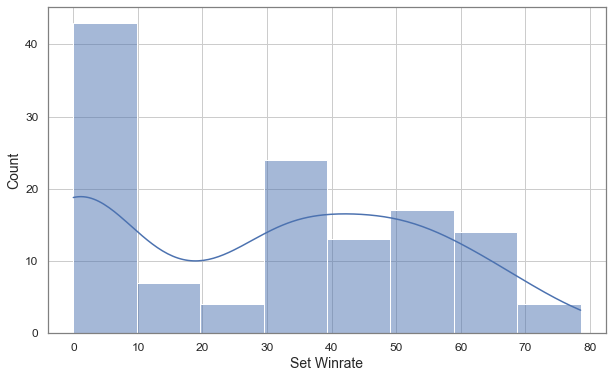

In [48]:
# Histogram of Set Winrate
sns.histplot(statsdf['Set Winrate'], bins="auto", kde=True)

As we can see, players with low appearances can trickle their way in to the highest winrates. We should apply confidence intervals to provide an estimation of a player's true winrate.

### 4.2.1. Confidence Intervals

In [49]:
# Determine a player's low and high Confidence Interval (C.I.) bands
from statsmodels.stats.proportion import proportion_confint

ciLowArray = []
ciHighArray = []
for sw, st in zip(statsdf["Set Wins"], statsdf["Set Total"]):
                  ciLow, ciHigh = proportion_confint(sw, st, method='wilson')
                  ciLowArray.append(ciLow)
                  ciHighArray.append(ciHigh)
statsdf["CI Low Sets"] = ciLowArray
statsdf["CI High Sets"] = ciHighArray

statsdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets
0,2ednar,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620
1,AU_Leenykins,2,0,4,1,8,4,9,0.000000,11.111111,0.000000,0.489891
2,Alfon42,10,4,20,12,42,24,54,16.666667,22.222222,0.066787,0.358531
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391,0.634201,0.779570
4,Altair,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620


In [57]:
# Get top 20 for graph.
filterdf = statsdf.sort_values(by="Set Winrate", ascending=False).head(20)

# Check it works
filterdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets
108,Yätta,24,99,27,256,128,126,384,78.571429,66.666667,0.706179,0.848344
81,Ripha,97,330,108,909,458,438,1367,75.342466,66.495977,0.710972,0.791471
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391,0.634201,0.779570
79,Raffa_,21,75,34,195,104,109,299,68.807339,65.217391,0.595953,0.767389
45,JrARMS,10,37,17,97,63,54,160,68.518519,60.625000,0.552566,0.793207


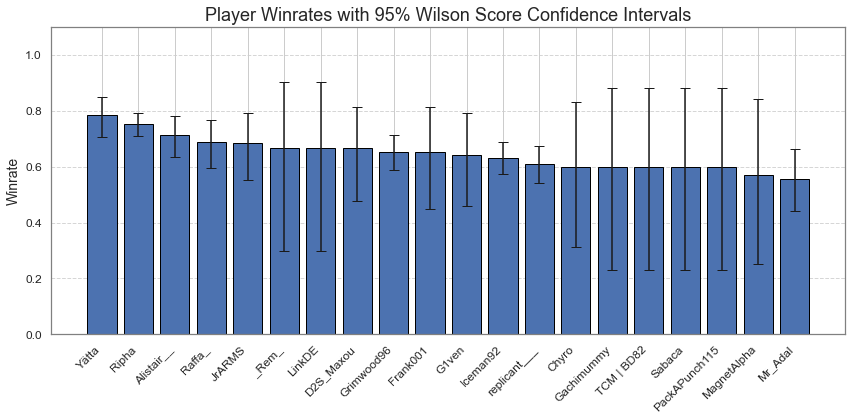

In [58]:
filterdf["Set Winrate"] = filterdf.apply(lambda x: x["Set Winrate"]/100, axis=1)

# Plot
plt.figure(figsize=(12, 6))
x = np.arange(len(filterdf))
y = filterdf["Set Winrate"]
yerr = [y - filterdf["CI Low Sets"], filterdf["CI High Sets"] - y]

plt.bar(x, y, yerr=yerr, capsize=5, edgecolor='black')
plt.xticks(x, filterdf["Player_Map"], rotation=45, ha="right")
plt.ylabel("Winrate")
plt.ylim(0, 1.1)
plt.title("Player Winrates with 95% Wilson Score Confidence Intervals")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

A lot easier to see the players who have earned their high winrate and those who performed well in a low number of tournaments.

In [107]:
# To-Do later:
# Look into CI range cut-offs. 

## 4.3. Average Placement

Determining a player's average placement in a tournament. Useful as another metric for evaluating player performance.

In [59]:
# "Flatten" the dataframe to get each player, tournament played in, and placement

df1 = df[["Player1", "Tournament No", "P1 Placement"]].rename(
    columns={"Player1": "Player", "P1 Placement": "Placement"})

df2 = df[["Player2", "Tournament No", "P2 Placement"]].rename(
columns={"Player2": "Player", "P2 Placement": "Placement"})

# Combine
combined = pd.concat([df1,df2]).drop_duplicates().reset_index()
combined

,index,Player,Tournament No,Placement
0,0,Alumento,1,7
1,1,BambooBoss,1,13
2,2,Kotorious BRD,1,13
3,3,RD | | Dushni,1,17
4,4,InkA_,1,9
...,...,...,...,...
1180,2123,PawlSLax,108,9
1181,2141,Alfon42,109,9
1182,2159,Toadsie,110,9
1183,2175,YoshiBowser,111,5


In [60]:
# Group by player and get mean placement
avgPlacement = combined.groupby(["Player"]).agg({
    "Placement": "mean"
}).reset_index()

avgPlacement.sort_values(by="Placement", ascending=True)

,Player,Placement
4,Alistair__,1.428571
86,Ripha,1.882979
113,Yätta,1.916667
48,JrARMS,2.800000
31,G1ven,3.000000
...,...,...
75,Olgilvie,17.000000
76,Owdy,17.000000
9,Anomika,17.000000
0,2ednar,17.000000


In [61]:
# Outer join to playerdf on "Player"
playerdf = pd.merge(playerdf, avgPlacement, on="Player", how="outer")
playerdf

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Placement
0,0,164493,2ednar,2ednar,1,0,2,0,4,17.000000
1,0,2992428,AU_Leenykins,AU_Leenykins,2,0,4,1,8,17.000000
2,0,2942327,Alfon42,Alfon42,10,4,20,12,42,9.000000
3,0,4324849,Alistair__,Alistair13,4,16,8,37,21,3.500000
4,0,5390120,Alistair__,Alistair__,14,56,16,154,73,1.428571
...,...,...,...,...,...,...,...,...,...,...
128,0,3871919,seeAlly,seeAlly,1,0,2,0,4,17.000000
129,0,3724750,sillyLao,sillyLao,1,1,2,2,4,7.000000
130,0,2883455,xXKuzan,xXKuzan,1,0,2,0,4,9.000000
131,0,2383899,Šime,Šime,5,3,10,6,22,11.800000


Due to multiple accounts from players, with differing number of appearances, a weight will be applied to the average placement. The weight being their EUAC appearances. This can be summed later and divided by the total EUAC appearances from each account to get the true average placment

In [62]:
# Weighted placement. Placement * Appearances
playerdf["Weighted Placement"] = playerdf.apply(lambda x: x["Placement"]*x["EUAC Appearances"], axis=1)
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Placement,Weighted Placement
0,0,164493,2ednar,2ednar,1,0,2,0,4,17.000000,17.0
1,0,2992428,AU_Leenykins,AU_Leenykins,2,0,4,1,8,17.000000,34.0
2,0,2942327,Alfon42,Alfon42,10,4,20,12,42,9.000000,90.0
3,0,4324849,Alistair__,Alistair13,4,16,8,37,21,3.500000,14.0
4,0,5390120,Alistair__,Alistair__,14,56,16,154,73,1.428571,20.0


In [63]:
# Group by unique Player identifier and sum appearances and weighted placement
truePlacement = playerdf.groupby("Player_Map").agg({
    "EUAC Appearances": "sum",
    "Weighted Placement": "sum"
}).reset_index()
truePlacement.head()

,Player_Map,EUAC Appearances,Weighted Placement
0,2ednar,1,17.0
1,AU_Leenykins,2,34.0
2,Alfon42,10,90.0
3,Alistair__,29,73.0
4,Altair,1,17.0


In [64]:
# True average placement. Total weighted placement/total appearances
truePlacement["Average Placement"] = truePlacement.apply(lambda x:x["Weighted Placement"]/x["EUAC Appearances"], axis=1)
truePlacement.sort_values(by="Average Placement", ascending = True).head(10)

,Player_Map,EUAC Appearances,Weighted Placement,Average Placement
81,Ripha,97,182.648936,1.882979
108,Yätta,24,46.000000,1.916667
3,Alistair__,29,73.000000,2.517241
45,JrARMS,10,28.000000,2.800000
79,Raffa_,21,63.000000,3.000000
30,Gachimummy,1,3.000000,3.000000
110,_Rem_,1,3.000000,3.000000
86,Sabaca,1,3.000000,3.000000
28,G1ven,5,15.000000,3.000000
37,Iceman92,62,198.000000,3.193548


Ripha, Yatta and Alistair seem to be the top 3. Yatta had the edge on Ripha when it came to winrates but Ripha has a better average placement. Also has more tournaments to boot.

In [65]:
# Drop columns to left join on statsdf
truePlacement.drop(columns=["Weighted Placement", "EUAC Appearances"], inplace=True)
statsdf = pd.merge(statsdf, truePlacement, on="Player_Map", how="left")

statsdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement
0,2ednar,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000
1,AU_Leenykins,2,0,4,1,8,4,9,0.000000,11.111111,0.000000,0.489891,17.000000
2,Alfon42,10,4,20,12,42,24,54,16.666667,22.222222,0.066787,0.358531,9.000000
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391,0.634201,0.779570,2.517241
4,Altair,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000


## 5. Match Analysis

In [164]:
df = pd.read_csv("MatchAnalysis.csv")
playerdf = pd.read_csv("PlayerAnalysis.csv")
statsdf = pd.read_csv("StatsAnalysis.csv")

## 5.1. How many Tournaments have there been? 

In [165]:
df["Tournament No"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111], dtype=int64)

There have been 111 EUACs.

## 5.2. Average amount of matches per tourney?

In [166]:
# Group by tournament no and take maximum match no. Get mean of that.
filterdf = df[["Tournament No", "MatchNo"]]
filterdf.groupby(["Tournament No"])["MatchNo"].max().mean()

19.7027027027027

Average EUAC has ~19.7 matches 

## 5.3. Score Distribution

In [167]:
df["Score"].unique()

array(['2-0', '0--1', '2-1', '3-1', '3-0', '3-2'], dtype=object)

In [168]:
values = df["Score"].value_counts()
values

2-0     1195
2-1      508
3-1      144
3-0      135
3-2      122
0--1      83
Name: Score, dtype: int64

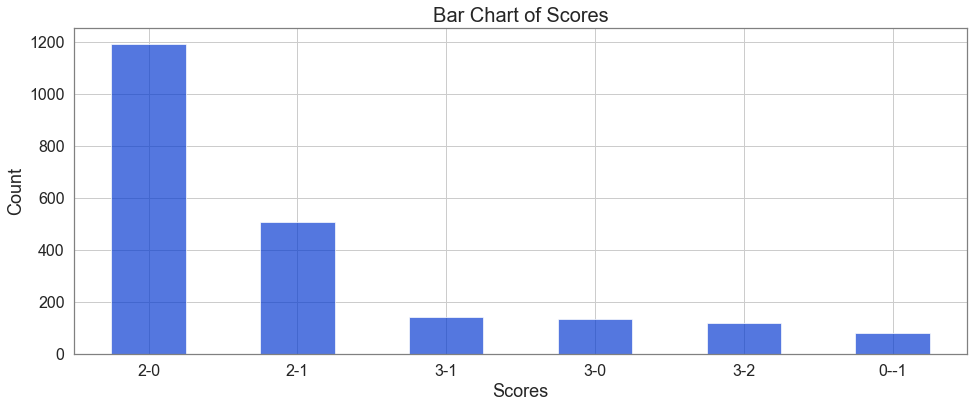

In [169]:
values.plot(kind="bar", color="#0035d0", grid=True, alpha=0.67)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Scores")
plt.show()

Most common score is a 2-0. Out numbering the next highest, 2-1, by double <br>
"Finals" are less common but they are roughly the same. But 3-2 is the lowest indicating that Finals are not generally all that even 

## 5.4. Seed vs Placement<br>
Section for evaluating a player's seeding to see how it corresponds to their placement.  
Will be done by comparing each player's seeding to their placement and using a scatter plot to see it.

In [170]:
# Get every player's seeding, placement
filterdf1 = df[["Player1", "P1 Seed", "P1 Placement", "Tournament No"]].rename(columns={
    "Player1" : "Player",
    "P1 Seed" : "Seed",
    "P1 Placement": "Placement",
    "Tournament No": "Tournament No"
})

filterdf2 = df[["Player2", "P2 Seed", "P2 Placement", "Tournament No"]].rename(columns={
    "Player2": "Player",
    "P2 Seed" : "Seed",
    "P2 Placement" : "Placement",
    "Tournament No" : "Tournament No"
})

# combine
filterdf = pd.concat([filterdf1,filterdf2]).drop_duplicates()
filterdf.head()

,Player,Seed,Placement,Tournament No
0,Alumento,11,7,1
1,BambooBoss,14,13,1
2,Kotorious BRD,15,13,1
3,RD | | Dushni,12,17,1
4,InkA_,13,9,1


<AxesSubplot:xlabel='Seed', ylabel='Placement'>

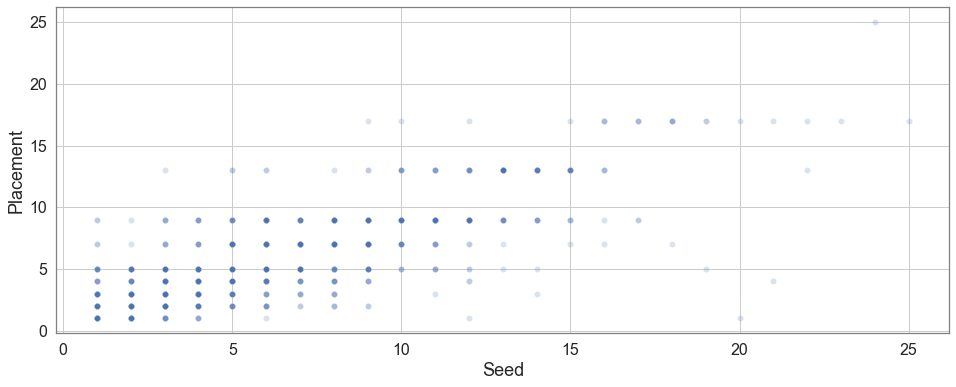

In [171]:
# Scatter plot of seeding vs placement
sns.scatterplot(x="Seed", y="Placement", data=filterdf, alpha=0.2)

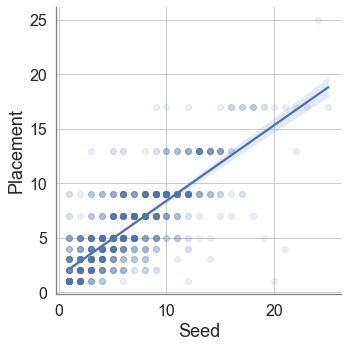

In [172]:
# Trend line
sns.lmplot(data=filterdf, x='Seed', y='Placement', scatter_kws={'alpha': 0.1})

#Height, aspect

In [173]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(filterdf['Seed'], filterdf['Placement'])
print(f"Spearman correlation: {corr:.2f}, p-value: {p_value:.4f}")

Spearman correlation: 0.80, p-value: 0.0000


Correlation of 0.8 suggests that the model is highly correlated. Concentrated in bottom-left. Can mean that top players are seeded more accurately but tournament sizes are not fixed. 20+ player tournaments are rare. <br> <br>
Bottom-right shows a few upsets. Low seeded players ranking quite high.

### 5.4.1. Upsets <br>
An upset is when a player does not perform as expected. <br>
Example: A low seeded player besting a high seeded player in a set.

In [174]:
# "Diff" is the range between a player's seeding and placement. 
filterdf["Diff"] = filterdf.apply(lambda x:x["Seed"]-x["Placement"], axis=1)
filterdf.sort_values(by="Diff", ascending=False)

,Player,Seed,Placement,Tournament No,Diff
22,D2S_Maxou,20,1,1,19
34,Raffa_,21,4,1,17
25,Frank001,19,5,1,14
118,LinkDE,18,7,5,11
251,G1ven,14,3,9,11
...,...,...,...,...,...
388,ocrim_ger,5,13,15,-8
11,Raayo,5,13,1,-8
10,Gleeface,9,17,1,-8
19,Linkirto,1,9,1,-8


Even just this snapshot shows that the first tournament had a lot of upsets. Being that it was the first tournament, it is reasonable to assume it was not seeded correctly.

In [175]:
filterdf = df
filterdf["Diff"] = filterdf.apply(lambda x: x["P1 Seed"] - x["P2 Seed"], axis=1)
filterdf.sort_values(by="Diff", ascending=True)

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No,Diff
26,Linkirto,D2S_Maxou,D2S_Maxou,2-1,Linkirto,27,1,2017-10-21,1,9,20,1,1,-19
35,ocrim_ger,D2S_Maxou,D2S_Maxou,2-0,ocrim_ger,36,1,2017-10-21,2,5,20,1,1,-18
97,Landi,GHS_Mats,Landi,0--1,GHS_Mats,2,5,2018-07-15,8,9,25,17,5,-17
19,Linkirto,TCM | BD82,Linkirto,2-1,TCM | BD82,20,1,2017-10-21,1,9,17,9,1,-16
106,D2S_Maxou,Anomika,D2S_Maxou,0--1,Anomika,11,5,2018-07-15,1,3,17,17,5,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Raffa_,Frank001,Frank001,3-1,Raffa_,19,3,2017-09-12,12,4,2,3,3,10
32,Frank001,SC☆Momso,Frank001,2-0,SC☆Momso,33,1,2017-10-21,19,5,7,7,1,12
28,Frank001,Ripha,Ripha,2-0,Frank001,29,1,2017-10-21,19,5,6,2,1,13
41,D2S_Maxou,Ripha,D2S_Maxou,3-0,Ripha,42,1,2017-10-21,20,1,6,2,1,14


### 5.4.2. Winrate by seed

In [176]:
df1 = df[["Player1", "P1 Seed", "Winner"]].rename(columns={
    "Player1": "Player",
    "P1 Seed" : "Seed"
})
df2 = df[["Player2", "P2 Seed", "Winner"]].rename(columns={
    "Player2" : "Player",
    "P2 Seed" : "Seed"
})

seed_df = pd.concat([df1,df2])

seed_df["Won"] = seed_df["Player"] == seed_df["Winner"]

winrate_by_seed = seed_df.groupby("Seed")["Won"].mean()

In [177]:
winrate_by_seed

Seed
1     0.757028
2     0.679463
3     0.587174
4     0.537313
5     0.466667
6     0.462312
7     0.414566
8     0.405316
9     0.337398
10    0.173653
11    0.274074
12    0.339286
13    0.205882
14    0.307692
15    0.263158
16    0.238095
17    0.375000
18    0.285714
19    0.400000
20    0.750000
21    0.500000
22    0.200000
23    0.000000
24    0.000000
25    0.333333
Name: Won, dtype: float64

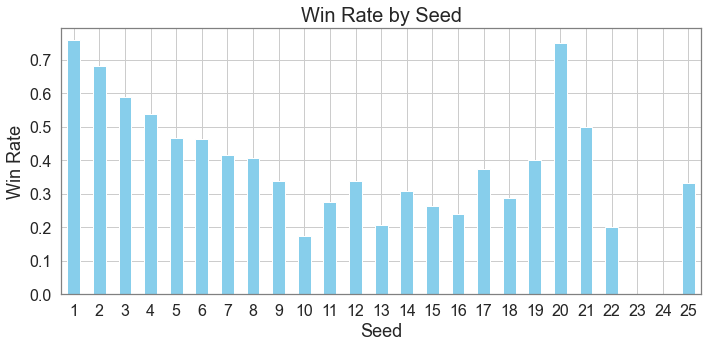

In [178]:
plt.figure(figsize=(10, 5))
winrate_by_seed.plot(kind="bar", color="skyblue")
plt.ylabel("Win Rate")
plt.xlabel("Seed")
plt.title("Win Rate by Seed")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Shows that players with the higher seed have a higher winrate. But tournies with higher numbers skew the results.

# 6. Trends over time

## 6.1. Tourney size over time

To get the tourney size, the number of participants per tourney needs to be known.  
To do this, the df will be reshaped into a vertical one. Player 1 and Player 2 will be merged into just Player. And then unique Player per tourney will be the solution.

In [179]:
df.drop("Diff", axis="columns", inplace=True)
df.head()

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
0,Alumento,Owdy,Alumento,2-0,Owdy,1,1,2017-10-21,11,7,22,17,1
1,BambooBoss,Frank001,Frank001,2-0,BambooBoss,2,1,2017-10-21,14,13,19,5,1
2,Kotorious BRD,Altair,Kotorious BRD,0--1,Altair,3,1,2017-10-21,15,13,18,17,1
3,RD | | Dushni,Raffa_,Raffa_,2-0,RD | | Dushni,4,1,2017-10-21,12,17,21,4,1
4,InkA_,D2S_Maxou,InkA_,2-1,D2S_Maxou,5,1,2017-10-21,13,9,20,1,1


In [180]:
df1 = df[["Player1", "Tournament No", "Date"]].rename(columns={
    "Player1" : "Player"
})

df2 = df[["Player2", "Tournament No", "Date"]].rename(columns={
    "Player2" : "Player"
})

combine = pd.concat([df1,df2])

combine = combine.drop_duplicates()

In [181]:
testing = combine.groupby(["Tournament No", "Date"])["Player"].size().reset_index(name="PlayerCount")

<AxesSubplot:xlabel='Tournament No', ylabel='PlayerCount'>

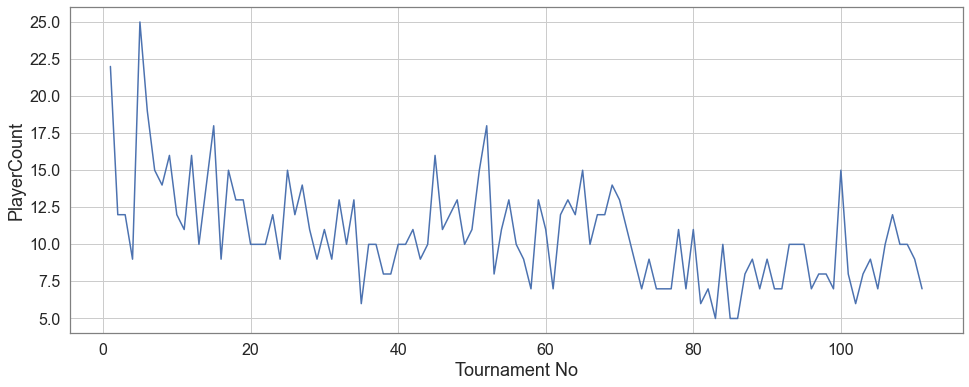

In [182]:
sns.lineplot(x='Tournament No', y='PlayerCount', data=testing)

Tournaments have been steadily declining in popularity over the run. 

##  6.2. Player Performance over time

### 6.2.1. Identifying the strongest players  
  
Measuring every player's performance will be done but we should focus only a select handful for the purposes of demonstration. One metric we will examine are the people who have won a tournament.

#### 6.2.1.1. Who has won an EUAC tourney?

In [183]:
# Add players to a set that have had a placement of 1. Sets don't contain duplicates
players = set()
for i in playerdf["Player_Map"]:
    for a,b,c,d in zip(df["Player1"], df["Player2"], df["P1 Placement"], df["P2 Placement"]):
        if i == a:
            if c == 1:
                players.add(i)
                continue
            else:
                continue
        if i == b:
            if d == 1:
                players.add(i)
                continue
            else:
                continue
players

{'Alistair__',
 'D2S_Maxou',
 'Frank001',
 'Grimwood96',
 'Iceman92',
 'JrARMS',
 'Raffa_',
 'Ripha',
 'Shedy',
 'Yamber',
 'Yätta',
 'replicant___'}

These are the players that have one at least one tournament.

In [184]:
amount = len(players)
total = len(statsdf["Player_Map"])
avg = amount/total * 100

print(f"{amount} players have won at least one EUAC throughout its run.")

print(f"Out of {total} players, only {avg:.2f}% of them have won one!")

12 players have won at least one EUAC throughout its run.
Out of 126 players, only 9.52% of them have won one!


#### 6.2.1.2. Number of tournament wins

In [185]:
# Function to get someone's true name
def get_map(df, name):
    pmap = df[df["Player"] == name]
    if not pmap.empty:
        return pmap.iloc[0]["Player_Map"]
    else:
        print("Not Found")

In [186]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Placement,Weighted Placement
0,0,164493,2ednar,2ednar,1,0,2,0,4,17.000000,17.0
1,0,2992428,AU_Leenykins,AU_Leenykins,2,0,4,1,8,17.000000,34.0
2,0,2942327,Alfon42,Alfon42,10,4,20,12,42,9.000000,90.0
3,0,4324849,Alistair__,Alistair13,4,16,8,37,21,3.500000,14.0
4,0,5390120,Alistair__,Alistair__,14,56,16,154,73,1.428571,20.0


In [187]:
df1 = df[["Player1", "P1 Placement", "Tournament No"]].rename(columns={
    "Player1" : "Player",
    "P1 Placement" : "Placement"
})

df2 = df[["Player2", "P2 Placement", "Tournament No"]].rename(columns={
    "Player2" : "Player",
    "P2 Placement" : "Placement"
})

combine = pd.concat([df1,df2]).drop_duplicates()
winners = combine[combine["Placement"] == 1].reset_index()

# Replace player with their mapped name
for i in winners["Player"]:
    p_map = get_map(playerdf, i)
    if i != p_map:
        winners = winners.replace(i, p_map)

In [188]:
euacWins = winners["Player"].value_counts()
euacWins

Ripha           49
Iceman92        14
Yätta           13
Alistair__      10
Grimwood96       9
Raffa_           5
replicant___     4
Shedy            2
JrARMS           2
D2S_Maxou        1
Frank001         1
Yamber           1
Name: Player, dtype: int64

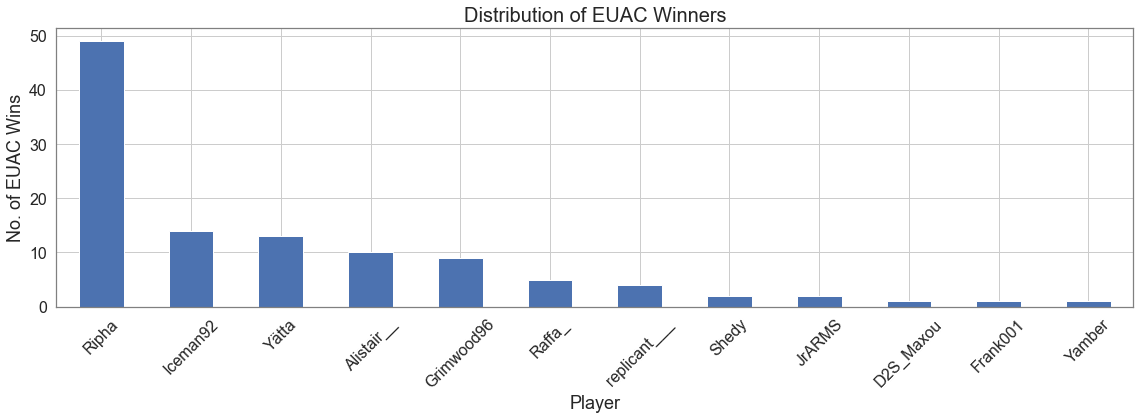

In [189]:
euacWins.plot(kind='bar')
plt.title('Distribution of EUAC Winners')
plt.xlabel('Player')
plt.ylabel('No. of EUAC Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ripha is clearly in the lead with 49 wins. Second-highest being Iceman92 with "only" 14 wins in comparison.  
Ripha has more wins than the next 4 people next to him. Showing his dominance over the scene.

In [190]:
# Merging EUAC winners onto the statsdf to track number of wins.

euacWins = euacWins.reset_index()
euacWins.columns = ["Player_Map", "EUAC Wins"]

# Outer Merge
statsdf = pd.merge(statsdf, euacWins, on="Player_Map", how="outer")

# Fill nans, convert float to int.
statsdf["EUAC Wins"] = statsdf["EUAC Wins"].fillna(0)
statsdf["EUAC Wins"] = statsdf["EUAC Wins"].astype(int)

In [191]:
statsdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement,EUAC Wins
0,2ednar,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000,0
1,AU_Leenykins,2,0,4,1,8,4,9,0.000000,11.111111,0.000000,0.489891,17.000000,0
2,Alfon42,10,4,20,12,42,24,54,16.666667,22.222222,0.066787,0.358531,9.000000,0
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391,0.634201,0.779570,2.517241,10
4,Altair,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000,0


#### 6.2.1.3. Win streaks

In [192]:
# Determine Win streaks

# Compares next row player for a change
change = winners["Player"] != winners["Player"].shift()
groupedId = change.cumsum()
winners['Streak Length'] = winners.groupby(groupedId).cumcount() + 1 # add one as it starts at zero
# Group by Player and their max streak
streak = winners.groupby("Player").agg({
    "Streak Length" : "max"
})
# Sort by players whose streak is greater than 1...
streak[streak["Streak Length"] > 1].sort_values(by="Streak Length", ascending=False)

,Streak Length
Player,
Ripha,8
Alistair__,4
Iceman92,4
Yätta,4
Grimwood96,2
Raffa_,2


### 6.2.2. Player Performance

To measure player performance we will apply an Elo rating to the match table.  
This will be tracked throughout every match so it can be tracked over time.

This is only intended to be a basic implementation of an Elo system. As such, each player's starting rating will be set to **1,500** and the K-Factor will **32** for every match.

#### **Elo Formulas**

Player A's adjusted rating after a set can be defined as:

$$
R'_A: R_A + K (S_A - E_A)
$$

Where:
- $R_{A}$: The rating of Player A.
- $R_B$: The rating of Player B.
- $K$: K-Factor.
- $S_A$: The actual score of Player A.
- $E_A$: The expected score of Player A.
<br>
<br>


The expected score of Player A is defined as:

$$
E_A = \frac{1}{1 + 10^{\left(\frac{R_B - R_A}{400}\right)}}
$$
<br>
This will provide a number between 0 and 1 which represents the odds of Player A beating Player B.
<br>
Therefore, Player B's expected score can be calculated as such:  
  
$$
E_B = 1 - E_A
$$


#### 6.2.2.1 Applying Elo

In [193]:
# Starting Elo at 1,500
statsdf["Elo"] = 1500
statsdf["Highest Elo"] = 1500

# Keeping functions needed in a .py file for neatness
import elo

In [194]:
pos = 0
k = 32 # k-value of 32 throughout. 
for p1, p2, s in zip(df["Player1"], df["Player2"], df["Score"]):
    
    # Get the player's identifying name (for merged accounts)
    a = get_map(playerdf, p1)
    b = get_map(playerdf, p2)
    
    # Retrieve elo for Player 1 and 2
    elo1 = int(elo.retrieve_elo(statsdf, a))
    elo2 = int(elo.retrieve_elo(statsdf, b))
    
    # Update pre match elos
    df.loc[pos, "Player 1 Elo"] = elo1
    df.loc[pos, "Player 2 Elo"] = elo2
    
    # Chance of Player 1 beating Player 2.
    expected1 = elo.expected_score(elo1,elo2)
    
    # Chance of P2 beating P1 is 1 - the prob of P1 winning
    expected2 = 1 - expected1
    
    if "--" in s: # catches disqualifications which are listed as "0--1"
        scoreWinner = 2
        scoreLoser = 0
    # If not DQ, then winner is the first value and loser the end value
    else:
        scoreWinner = int(s[:1])
        scoreLoser = int(s[-1:])
        
    # For the elo calculation formula. It's the wins in the set achieved over the total
    scoreWinner = scoreWinner/(scoreWinner + scoreLoser)
    scoreLoser = scoreLoser/(scoreWinner + scoreLoser)
    
    # If P1 is the winner...
    if p1 == df["Winner"][pos]:
        adjustedA = int(elo.adjusted_rating(k, elo1, expected1, scoreWinner)) # P1's adjusted score
        adjustedB = int(elo.adjusted_rating(k, elo2, expected2, scoreLoser)) # P2's adjusted score
    # Else P1 is the loser
    else:
        adjustedA = int(elo.adjusted_rating(k, elo1, expected1, scoreLoser)) # P1's adjusted score
        adjustedB = int(elo.adjusted_rating(k, elo2, expected2, scoreWinner)) # P2's adjusted score

    # Update tables
    elo.update_elo(df, "Player 1 Adjusted Elo", pos, adjustedA)
    elo.update_elo(df, "Player 2 Adjusted Elo", pos, adjustedB)
    elo.update_main_elo_table(statsdf, str(a), adjustedA)
    elo.update_main_elo_table(statsdf,str(b), adjustedB)
    
    elo1H = int(elo.retrieve_highest_elo(statsdf,a))
    elo2H = int(elo.retrieve_highest_elo(statsdf,b))
    
    #Update Highest Ever Elo if the adjusted rating is greater than the current
    if adjustedA > elo1H:
        elo.update_main_highest_elo_table(statsdf, str(a), adjustedA)
    if adjustedB > elo2H:
        elo.update_main_highest_elo_table(statsdf, str(b), adjustedB)
        
    pos = pos + 1 #Increment positional loop tracker by 1

In [195]:
statsdf.sort_values(by="Highest Elo", ascending=False).head(10).round(2)

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement,EUAC Wins,Elo,Highest Elo
81,Ripha,97,330,108,909,458,438,1367,75.34,66.50,0.71,0.79,1.88,49,2120,2123
3,Alistair__,29,104,42,270,144,146,414,71.23,65.22,0.63,0.78,2.52,10,2081,2101
34,Grimwood96,46,147,78,388,264,225,652,65.33,59.51,0.59,0.71,3.22,9,1952,1986
79,Raffa_,21,75,34,195,104,109,299,68.81,65.22,0.60,0.77,3.00,5,1968,1971
119,replicant___,43,123,79,317,247,202,564,60.89,56.21,0.54,0.67,3.70,4,1906,1911
37,Iceman92,62,175,102,466,335,277,801,63.18,58.18,0.57,0.69,3.19,14,1895,1901
63,Mortal_Instrument,33,71,65,179,179,136,358,52.21,50.00,0.44,0.60,4.42,0,1865,1873
45,JrARMS,10,37,17,97,63,54,160,68.52,60.62,0.55,0.79,2.80,2,1868,1868
108,Yätta,24,99,27,256,128,126,384,78.57,66.67,0.71,0.85,1.92,13,1822,1865
105,Yamber,85,164,169,413,438,333,851,49.25,48.53,0.44,0.55,5.01,1,1754,1832


In [196]:
statsdf.sort_values(by="Elo", ascending=False).head(10).round(2)

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement,EUAC Wins,Elo,Highest Elo
81,Ripha,97,330,108,909,458,438,1367,75.34,66.50,0.71,0.79,1.88,49,2120,2123
3,Alistair__,29,104,42,270,144,146,414,71.23,65.22,0.63,0.78,2.52,10,2081,2101
79,Raffa_,21,75,34,195,104,109,299,68.81,65.22,0.60,0.77,3.00,5,1968,1971
34,Grimwood96,46,147,78,388,264,225,652,65.33,59.51,0.59,0.71,3.22,9,1952,1986
119,replicant___,43,123,79,317,247,202,564,60.89,56.21,0.54,0.67,3.70,4,1906,1911
37,Iceman92,62,175,102,466,335,277,801,63.18,58.18,0.57,0.69,3.19,14,1895,1901
45,JrARMS,10,37,17,97,63,54,160,68.52,60.62,0.55,0.79,2.80,2,1868,1868
63,Mortal_Instrument,33,71,65,179,179,136,358,52.21,50.00,0.44,0.60,4.42,0,1865,1873
108,Yätta,24,99,27,256,128,126,384,78.57,66.67,0.71,0.85,1.92,13,1822,1865
109,ZZ_ARMS,15,27,29,79,77,56,156,48.21,50.64,0.36,0.61,5.07,0,1819,1821


#### 6.2.2.2 Inferential Statistical Tests for comparing means between two groups

Using inferential statistical tests, we will examine whether a player's Elo rating has a statistically significant impact on the outcome of a match. This is achieved by comparing the central tendency of the two groups "Winners" and "Losers".  

**Hypotheses:**

- **H₀ (Null Hypothesis):** Elo has no impact on the outcome of a match  
- **H₁ (Alternative Hypothesis):** Elo has an impact on the outcome of a match  
  
The point of this is to see if the elo rating system that has been implemented is working as intended.  
If so, we should be rejecting the Null Hypothesis.

In [197]:
# Test for normality

from scipy.stats import shapiro

alpha = 0.05 # Significance Level

data = pd.concat([df["Player 1 Elo"], df["Player 2 Elo"]])

# Perform Shapiro-Wilk test
stat, p_value = shapiro(data)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")
print()

# Interpretation

if p_value > alpha:
    print("P-value is greater than 0.05, so we fail to reject the null hypothesis — data appears normally distributed.")
else:
    print("P-value is less than or equal to 0.05, so we reject the null hypothesis — data is likely not normally distributed.")


Shapiro-Wilk Test Statistic: 0.9744824171066284
P-Value: 2.763310610104201e-27

P-value is less than or equal to 0.05, so we reject the null hypothesis — data is likely not normally distributed.


As the data is not likely to be normally distributed, we will use a **non-parametric** test to compare the two groups. Namely, a Mann-Whitney U test.

In [198]:
from scipy.stats import mannwhitneyu

group1 = [] # Winner elos
group2 = [] # Loser elos

for winner, p1, p2, p1Elo, p2Elo in zip(
    df["Winner"], df["Player1"], df["Player2"], df["Player 1 Elo"], df["Player 2 Elo"]
):
    if winner == p1:
        group1.append(p1Elo)
        group2.append(p2Elo)
    elif winner == p2:
        group1.append(p2Elo)
        group2.append(p1Elo)

stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Statistic: {stat}, P-value: {p_value}")
print()


if p_value < alpha:
    print(f"P-Value is less than {alpha}, therefore we reject the null hypothesis (H0) in favour of H1.")
else:
    print(f"P-Value is greater than {alpha}, therefore we fail to reject the null hypothesis.")
    print("This means that there is not enough evidence to support a statistical difference")

Statistic: 3240260.5, P-value: 7.560003839311374e-92

P-Value is less than 0.05, therefore we reject the null hypothesis (H0) in favour of H1.


We can now be confident that we can rely on the elo system to gauge a player's strength.

#### 6.2.2.3 - Elo examples

Elo can be used to get the player's chances in a match-up. We'll test some examples in this section and compare it to historical data.  
We will use some player's from the top 10 most active.

In [199]:
eloExamples = statsdf[["Player_Map", "EUAC Wins", "EUAC Appearances", "Elo", "Highest Elo"]].copy()
eloExamples.sort_values(by="EUAC Appearances", ascending=False).head(10)

,Player_Map,EUAC Wins,EUAC Appearances,Elo,Highest Elo
106,YoshiBowser,0,104,1487,1505
81,Ripha,49,97,2120,2123
105,Yamber,1,85,1754,1832
116,ocrim_ger,0,62,1661,1697
37,Iceman92,14,62,1895,1901
38,Iloria,0,50,1662,1678
74,Penzo,0,48,1658,1678
34,Grimwood96,9,46,1952,1986
119,replicant___,4,43,1906,1911
63,Mortal_Instrument,0,33,1865,1873


In [200]:
# Quick function for printing winrates between players.
# Not comprehensive. Doesn't do checks.
# Gets elo of both players and computes the odds of winning.
# Then looks at actual data.

def winPercentages(p1, p2):
    getAElo = int(statsdf.loc[statsdf["Player_Map"] == p1, "Elo"].values[0])
    getBElo = int(statsdf.loc[statsdf["Player_Map"] == p2, "Elo"].values[0])
    odds = elo.expected_score(getAElo, getBElo)
    odds = odds*100
    odds = round(odds)
    print(f"{p1} has a {odds}% chance against {p2} according to their current elo rating.")
    total = 0
    win = 0
    for a,b in zip(df["Winner"], df["Loser"]):
        if ((a == p1 and b == p2) or (a == p2 and b == p1)):
            total +=1
            if a == p1:
                win+=1
    winrate = round((win/total)*100)
    print("Historically, however...")
    print()
    print(f"{p1} and {p2} have played a total of {total} sets.")
    print(f"{p1} has won {win} times.")
    print()
    print(f"Therefore, {p1} has a {winrate}% winrate against {p2}")

In [201]:
winPercentages("YoshiBowser", "Ripha")

YoshiBowser has a 3% chance against Ripha according to their current elo rating.
Historically, however...

YoshiBowser and Ripha have played a total of 12 sets.
YoshiBowser has won 0 times.

Therefore, YoshiBowser has a 0% winrate against Ripha


In [202]:
winPercentages("Yamber", "ocrim_ger")

Yamber has a 63% chance against ocrim_ger according to their current elo rating.
Historically, however...

Yamber and ocrim_ger have played a total of 28 sets.
Yamber has won 19 times.

Therefore, Yamber has a 68% winrate against ocrim_ger


In [203]:
winPercentages("Iceman92", "Mortal_Instrument")

Iceman92 has a 54% chance against Mortal_Instrument according to their current elo rating.
Historically, however...

Iceman92 and Mortal_Instrument have played a total of 9 sets.
Iceman92 has won 7 times.

Therefore, Iceman92 has a 78% winrate against Mortal_Instrument


In [204]:
winPercentages("replicant___", "Grimwood96")

replicant___ has a 43% chance against Grimwood96 according to their current elo rating.
Historically, however...

replicant___ and Grimwood96 have played a total of 23 sets.
replicant___ has won 7 times.

Therefore, replicant___ has a 30% winrate against Grimwood96


In [205]:
winPercentages("Iloria", "Penzo")

Iloria has a 51% chance against Penzo according to their current elo rating.
Historically, however...

Iloria and Penzo have played a total of 6 sets.
Iloria has won 3 times.

Therefore, Iloria has a 50% winrate against Penzo


Overall, it looks pretty good. Player's been active at different times and low match-ups may affect things.

#### 6.2.2.4 Elo over time

In [206]:
# Function to return a player's first EUAC.
def firstEUAC(df, name):
    
    # Gets their "real" name
    trueName = get_map(playerdf, name)
    
    # Gets all alias
    aliases = playerdf[playerdf['Player_Map'] == trueName]['Player'].tolist()
    minEUAC = []
    
    # Get first EUAC for every alias
    for accounts in aliases:
        matches = df[(df["Player1"] == accounts) | (df["Player2"] == accounts)]
        currentIteration = matches["Tournament No"].min()
        firstTourney = matches["Tournament No"].min()
        minEUAC.append(firstTourney)
        
    # Return minimum EUAC
    first = min(minEUAC) 
    return int(first)

In [207]:
firstEUAC(df, "Alistair__")

51

In [208]:
# Returns a graph of a selection of players' elo history.

def elo_graph(selection, title):
    # Set theme
    sns.set_theme(style="whitegrid", rc={
        'figure.figsize': (16, 6), 
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'legend.fontsize': 14,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.edgecolor': 'gray'
    })
    palette = sns.color_palette("husl", n_colors=len(selection)) #Set2, hsl, husl
    for colour, players in zip(palette, selection["Player_Map"]):
        
        # Arrays for tracking elos throughout euacs
        eloArray = []
        euacArray = []
        
        # Starting Points
        eloArray = [1500]
        firstTourney = firstEUAC(df, players)
        euacArray = [firstTourney]
        
        # List of every player's alias
        alias = playerdf[playerdf["Player_Map"] == players]["Player"].tolist()
        
        # Scan through match df for every match that player has played
        for a,b,c,d,e in zip(df["Player1"], df["Player2"], df["Player 1 Adjusted Elo"], 
                             df["Player 2 Adjusted Elo"], df["Tournament No"]):
            for names in alias:    
                if a == names or b == names:
                    if a == names:
                        eloArray.append(c)
                        euacArray.append(e)
                    else:
                        eloArray.append(d)
                        euacArray.append(e)
        plt.plot(euacArray, eloArray, label=players, color=colour)
    
    # Add labels, title, and legend
    plt.xlabel("EUAC (No of Tournaments)")
    plt.ylabel("Elo")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

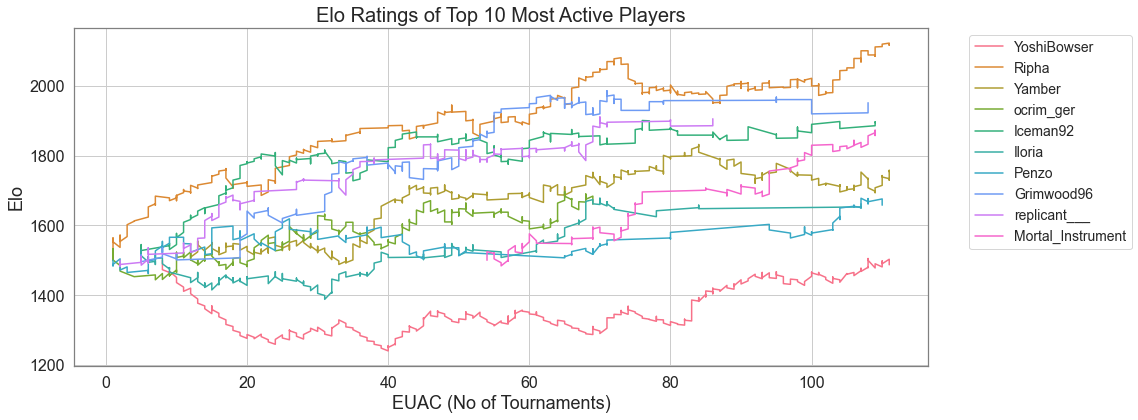

In [209]:
# Get top 10 players sorted by activity. 
mostActive = eloExamples.sort_values(by="EUAC Appearances", ascending=False).head(10)

elo_graph(mostActive, "Elo Ratings of Top 10 Most Active Players")

The most active players generally show improvement over its run (once their elo has settled from its starting point). This is be to expected from players who are frequently showing up to tournaments.  
One thing to note is that most players on this list have been around since the early days. With one exception being Mortal_Instrument who joined somewhere around the middle of the tournament's run. 

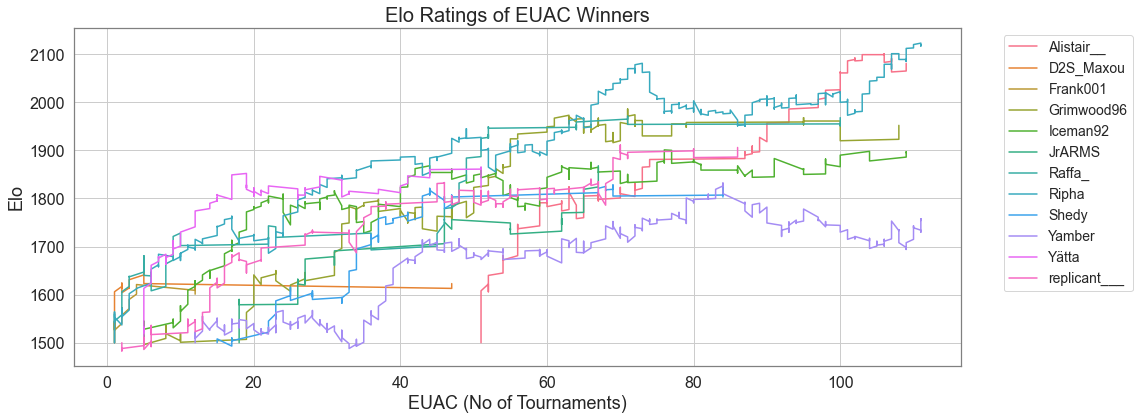

In [210]:
# Graphing the elo ratings of anyone who has won an EUAC

euacWinners = eloExamples[eloExamples["EUAC Wins"] > 0]
elo_graph(euacWinners, "Elo Ratings of EUAC Winners")

The graph shows that Yatta was the one to beat in the earlier days of the EUAC. And was only overtaken by Ripha once he became increasingly inactive.  
Ripha has been overtaken for brief periods by Iceman and Grimwood.  
Alistair seemed to have a meteoric rise. Showed up to the scene late and even managed to surpass Ripha for a spell.

In [211]:
df.to_csv("MatchFinal.csv", index=False)
playerdf.to_csv("PlayerFinal.csv", index=False)
statsdf.to_csv("StatsFinal.csv", index=False)

# 7. Deeper Patterns

Going to apply KMeans clustering to see if we can identify players based on clusters.  
Due to the information we have in statsdf, we'd like to see clusters of players based on their skills

In [250]:
df = pd.read_csv("MatchFinal.csv")
playerdf = pd.read_csv("PlayerFinal.csv")
statsdf = pd.read_csv("StatsFinal.csv")

## 7.1. Preperation for Machine Learning

In [251]:
# Making a score diff column which will be a player's total postive score minus their total negative.

scoredf = df.copy()

# Replace DQs with a 2-0
scoredf = scoredf.replace("0--1", "2-0")

# Split scores into P1's score and P2's score
scoredf[["P1_Score", "P2_Score"]] = scoredf["Score"].str.split("-", expand=True).astype(int)

# Get the "diff" but subtracting P1 and P2's score
scoredf["Player 1 Diff"] = scoredf["P1_Score"] - scoredf["P2_Score"]
scoredf["Player 2 Diff"] = scoredf["P2_Score"] - scoredf["P1_Score"]

# Group and sum
p1_diff = scoredf.groupby("Player1")["Player 1 Diff"].sum()
p2_diff = scoredf.groupby("Player2")["Player 2 Diff"].sum()

# Adds the two series together. "0" prevents NaN if a player is not present in the other column.
score_diff = (p1_diff.add(p2_diff, fill_value=0)).sort_values(ascending=False)

score_diff

Ripha           411.0
Iceman92        127.0
Yätta            86.0
replicant___     68.0
Shedy            57.0
                ...  
Kefgeru         -45.0
Captain_Daz     -48.0
SpiKeuR         -53.0
PawlSLax        -61.0
YoshiBowser    -247.0
Length: 133, dtype: float64

In [252]:
score_diff_df = score_diff.reset_index()
score_diff_df.columns = ["Player", "Score_Diff"]

playerdf = pd.merge(playerdf, score_diff_df, on="Player", how="outer")

In [253]:
# Group by unique Player identifier and sum appearances and weighted placement
trueScoreDiff = playerdf.groupby("Player_Map").agg({
    "Score_Diff": "sum"
}).reset_index()
trueScoreDiff.head()

,Player_Map,Score_Diff
0,2ednar,-4.0
1,AU_Leenykins,-3.0
2,Alfon42,-30.0
3,Alistair__,60.0
4,Altair,-4.0


In [256]:
statsdf = pd.merge(statsdf, trueScoreDiff, on="Player_Map", how="outer")

statsdf.head()

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement,EUAC Wins,Elo,Highest Elo,Score_Diff_x,Score_Diff_y
0,2ednar,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000,0,1467,1500,-4.0,-4.0
1,AU_Leenykins,2,0,4,1,8,4,9,0.000000,11.111111,0.000000,0.489891,17.000000,0,1457,1500,-3.0,-3.0
2,Alfon42,10,4,20,12,42,24,54,16.666667,22.222222,0.066787,0.358531,9.000000,0,1431,1500,-30.0,-30.0
3,Alistair__,29,104,42,270,144,146,414,71.232877,65.217391,0.634201,0.779570,2.517241,10,2081,2101,60.0,60.0
4,Altair,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000,0,1468,1500,-4.0,-4.0


## 7.2. KMeans Clustering

In [242]:
clusterdf = statsdf[
    ["EUAC Appearances", "Set Winrate", "Match Winrate", "Average Placement",
     "Elo", "Highest Elo", "Score_Diff", "EUAC Wins", "Player_Map"]]

In [243]:
clusterdf = clusterdf[clusterdf["EUAC Appearances"] > 1]

In [244]:
from sklearn.preprocessing import StandardScaler

features = clusterdf.drop(columns=["Player_Map"])  # only numeric columns
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [245]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

clusterdf = clusterdf.copy()
clusterdf["Cluster"] = kmeans.fit_predict(X)

# Merge cluster assignments back into the original statsdf
statsdf = statsdf.merge(
    clusterdf[["Player_Map", "Cluster"]],
    on="Player_Map",
    how="left" 
)

In [246]:
statsdf.sort_values(by="Cluster", ascending=False)

,Player_Map,EUAC Appearances,Set Wins,Set Losses,Match Wins,Match Losses,Set Total,Match Total,Set Winrate,Match Winrate,CI Low Sets,CI High Sets,Average Placement,EUAC Wins,Elo,Highest Elo,Score_Diff,Cluster
81,Ripha,97,330,108,909,458,438,1367,75.342466,66.495977,0.710972,0.791471,1.882979,49,2120,2123,411.0,3.0
63,Mortal_Instrument,33,71,65,179,179,136,358,52.205882,50.000000,0.438661,0.604245,4.424242,0,1865,1873,-6.0,2.0
108,Yätta,24,99,27,256,128,126,384,78.571429,66.666667,0.706179,0.848344,1.916667,13,1822,1865,86.0,2.0
87,Shedy,22,49,40,133,110,89,243,55.056180,54.732510,0.447263,0.649676,4.409091,2,1803,1828,57.0,2.0
34,Grimwood96,46,147,78,388,264,225,652,65.333333,59.509202,0.589046,0.712473,3.217391,9,1952,1986,54.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,benano,1,2,2,4,5,4,9,50.000000,44.444444,0.150039,0.849961,9.000000,0,1500,1516,-3.0,NaN
115,nikes2004,1,1,2,2,4,3,6,33.333333,33.333333,0.061492,0.792340,13.000000,0,1502,1516,-2.0,NaN
121,seeAlly,1,0,2,0,4,2,4,0.000000,0.000000,0.000000,0.657620,17.000000,0,1470,1500,-4.0,NaN
122,sillyLao,1,1,2,2,4,3,6,33.333333,33.333333,0.061492,0.792340,7.000000,0,1496,1516,-2.0,NaN


In [247]:
cluster_summary = clusterdf.groupby("Cluster").mean()
print(cluster_summary)

         EUAC Appearances  Set Winrate  Match Winrate  Average Placement  \
Cluster                                                                    
0                9.880000     8.699688      16.579430          10.359531   
1               11.937500    45.503369      46.170461           6.446392   
2               33.833333    61.401053      57.359596           3.562857   
3               97.000000    75.342466      66.495977           1.882979   

                 Elo  Highest Elo  Score_Diff  EUAC Wins  
Cluster                                                   
0        1442.880000   1502.72000  -23.120000     0.0000  
1        1563.343750   1584.15625   -7.562500     0.0625  
2        1878.333333   1898.50000   42.916667     5.0000  
3        2120.000000   2123.00000  411.000000    49.0000  


[Cluster numbers can change due to randomness]    
Clusters 0 and 3 capture players who are active, 14 and 15 averaged appearances, but there is a difference in terms of their skill level. Cluster 0 have higher winrates, match winrates, lower (better) placements, higher elos and a lower score diff (better).  
  
Cluster 1 on the other hand captures players who are even more active than the other two, and have achieved win more of their matches. 
  
Cluster 2 is Ripha. The player is such an outlier. He has an unprecedented dominance over the scene.

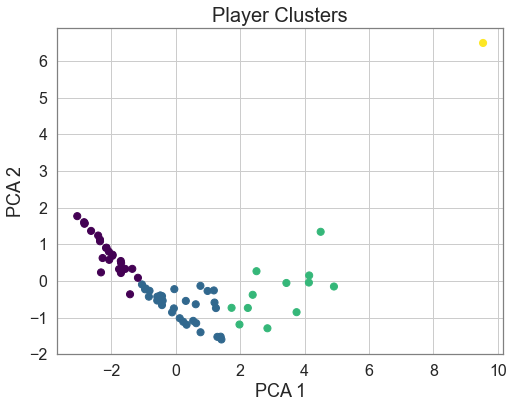

In [248]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusterdf["Cluster"], cmap="viridis", s=50)
plt.title("Player Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

C:\Users\yamyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


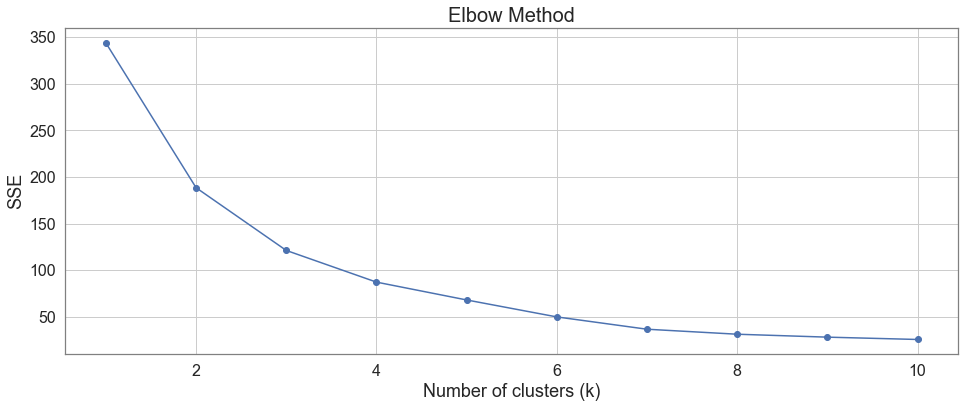

In [230]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [85]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")

Silhouette Score for 2 clusters: 0.406
Silhouette Score for 3 clusters: 0.409
Silhouette Score for 4 clusters: 0.364
Silhouette Score for 5 clusters: 0.381
Silhouette Score for 6 clusters: 0.339
Silhouette Score for 7 clusters: 0.351
Silhouette Score for 8 clusters: 0.343
Silhouette Score for 9 clusters: 0.316
Silhouette Score for 10 clusters: 0.271


In [86]:
# See how many players in each cluster
statsdf["Cluster"].value_counts()

0.0    22
2.0    18
3.0    12
1.0     1
Name: Cluster, dtype: int64

In [87]:
# List players in Cluster 1
statsdf[statsdf["Cluster"] == 3][["Player_Map", "Cluster"]]

,Player_Map,Cluster
3,Alistair__,3.0
34,Grimwood96,3.0
37,Iceman92,3.0
45,JrARMS,3.0
63,Mortal_Instrument,3.0
64,Mr_Adal,3.0
79,Raffa_,3.0
87,Shedy,3.0
105,Yamber,3.0
108,Yätta,3.0


<AxesSubplot:xlabel='Cluster', ylabel='Elo'>

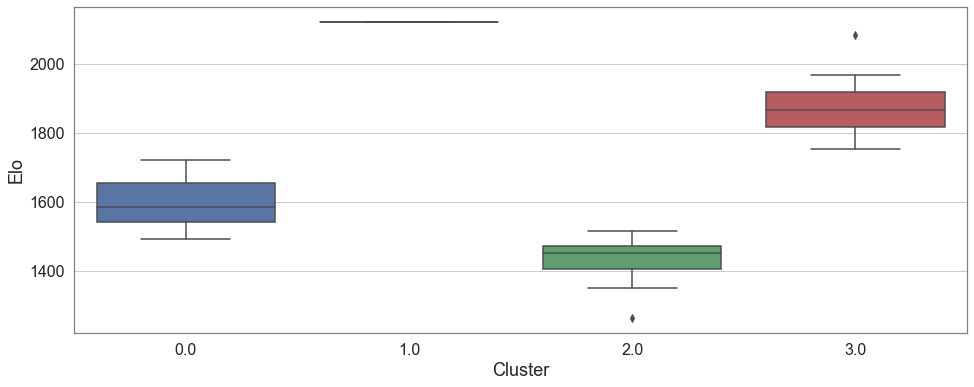

In [88]:
# Visualize Elo by cluster
import seaborn as sns
sns.boxplot(data=statsdf, x="Cluster", y="Elo")

# Rough work/ Examples

Section will be removed when all sections have been implemented. <br>
Purpose is to have use cases of examples to work by. Sometimes taken from websites, sometimes AI prompts. 

## 2.2 Correlations

In [21]:
matches

,Player,Seed,Winner,Won
0,Alumento,11,Alumento,True
1,BambooBoss,14,Frank001,False
2,Kotorious BRD,15,Kotorious BRD,True
3,RD | | Dushni,12,Raffa_,False
4,InkA_,13,InkA_,True
...,...,...,...,...
4369,YoshiBowser,5,DoJoSeph,False
4370,Yamber,4,Yamber,True
4371,Giusesbica004,2,Ripha,False
4372,Yamber,4,Yamber,True


In [22]:
match_counts

Seed
1     498
2     521
3     499
4     469
5     420
6     398
7     357
8     301
9     246
10    167
11    135
12    112
13     68
14     52
15     38
16     21
17     16
18     14
19     10
20     12
21      8
22      5
23      2
24      2
25      3
Name: Won, dtype: int64

In [23]:
winrate_by_seed

Seed
1     0.757028
2     0.679463
3     0.587174
4     0.537313
5     0.466667
6     0.462312
7     0.414566
8     0.405316
9     0.337398
10    0.173653
11    0.274074
12    0.339286
13    0.205882
14    0.307692
15    0.263158
16    0.238095
17    0.375000
18    0.285714
19    0.400000
20    0.750000
21    0.500000
22    0.200000
23    0.000000
24    0.000000
25    0.333333
Name: Won, dtype: float64

In [8]:
heat = df.corr()

In [9]:
heat

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
MatchNo,1.000000,-0.027995,-0.169150,-0.211780,-0.341174,-0.276771
P1 Seed,-0.027995,1.000000,0.700772,0.441375,0.446473,-0.244598
P1 Placement,-0.169150,0.700772,1.000000,0.527211,0.471855,-0.223788
P2 Seed,-0.211780,0.441375,0.527211,1.000000,0.754884,-0.314577
P2 Placement,-0.341174,0.446473,0.471855,0.754884,1.000000,-0.211962
Tournament No,-0.276771,-0.244598,-0.223788,-0.314577,-0.211962,1.000000


<AxesSubplot:>

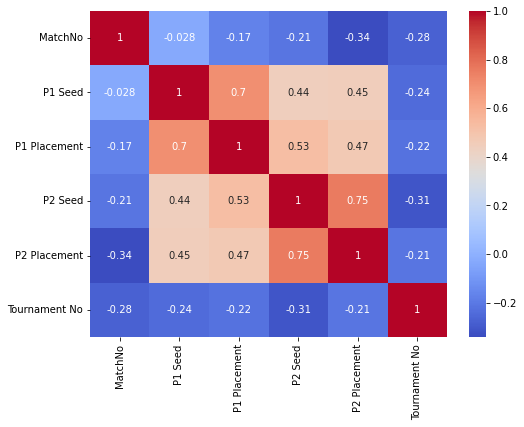

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=heat, annot=True, cmap="coolwarm")

High correlation between a player's seeding and their placement (0.7 for Player 1 and 0.75 for Player 2). <br>
Suggesting that players are usually seeded appropriately

In [18]:
counts = (
    df.melt(id_vars="Tournament No", value_vars=["Winner", "Loser"])
      .drop("variable", axis=1)
      .drop_duplicates()
      .groupby("Tournament No")
      .size()
      .reset_index(name="PlayerCount")
)

print(counts)

     Tournament No  PlayerCount
0                1           22
1                2           12
2                3           12
3                4            9
4                5           25
..             ...          ...
106            107           12
107            108           10
108            109           10
109            110            9
110            111            7

[111 rows x 2 columns]


In [19]:
counts.sort_values(by="PlayerCount", ascending=False)

,Tournament No,PlayerCount
4,5,25
0,1,22
5,6,19
14,15,18
51,52,18
...,...,...
80,81,6
34,35,6
85,86,5
82,83,5


EUAC 5 had the highest number of entrants with 25 competing whilst EUACs 83,85 and 86 has the lowest with only 5 participating

In [32]:
avg = counts["PlayerCount"].mean()
med = counts["PlayerCount"].median()

In [35]:
f"The Average EUAC has {avg:.2f} players per tournament and a median of {med}"

'The Average EUAC has 10.68 players per tournament and a median of 10.0'

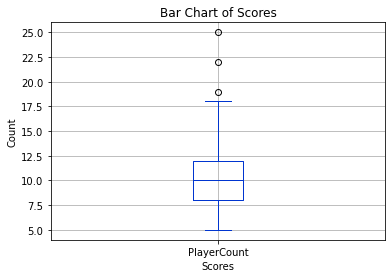

In [31]:
counts["PlayerCount"].plot(kind="box", color="#0035d0", grid=True)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Player Count")
plt.show()

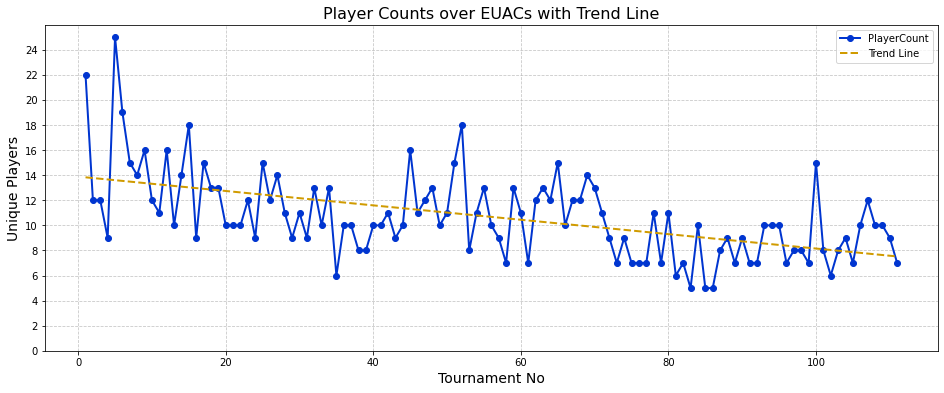

In [22]:
# Scatter plot + line
plt.figure(figsize=(16, 6))
ax = plt.gca() #Keep everything on same plot

# Line plot
counts.plot(x="Tournament No", y="PlayerCount", kind="line", marker='o', ax=ax, linewidth=2, color="#0035d0")

# Trend line
z = np.polyfit(counts["Tournament No"], counts["PlayerCount"], 1)
p = np.poly1d(z)
plt.plot(counts["Tournament No"], p(counts["Tournament No"]), linewidth=2, label="Trend Line", linestyle='--', color="#d09b00")

# Labels and title
plt.title("Player Counts over EUACs with Trend Line", fontsize=16)
plt.xlabel("Tournament No", fontsize=14)
plt.ylabel("Unique Players", fontsize=14)
plt.legend()

# Set y-axis to only show whole numbers
max_count = counts["PlayerCount"].max()
plt.yticks(np.arange(0, max_count + 1, 2))  # from 0 to max, step by 1

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Downward trend. This shows that the tournament series is losing players, slowly, throughout its run. It is approximately losing 0.05 players per tournament

In [25]:
# Correlation
correlation = counts["Tournament No"].corr(counts["PlayerCount"])
print(f"Correlation between Tournament No and Player Count: {correlation:.2f}") #Two decimal places

# Trend line equation
z = np.polyfit(counts["Tournament No"], counts["PlayerCount"], 1)
slope, intercept = z
print(f"Trend Line Equation: PlayerCount = {slope:.2f} * Tournament No + {intercept:.2f}")

Correlation between Tournament No and Player Count: -0.54
Trend Line Equation: PlayerCount = -0.06 * Tournament No + 13.89


https://realpython.com/k-means-clustering-python